## 機械学習モデルによる単変数時系列データの予測

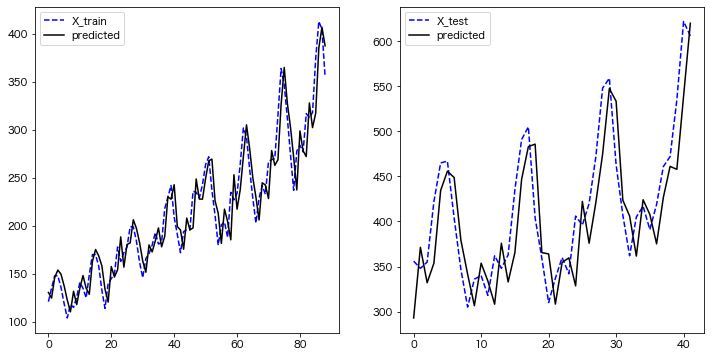

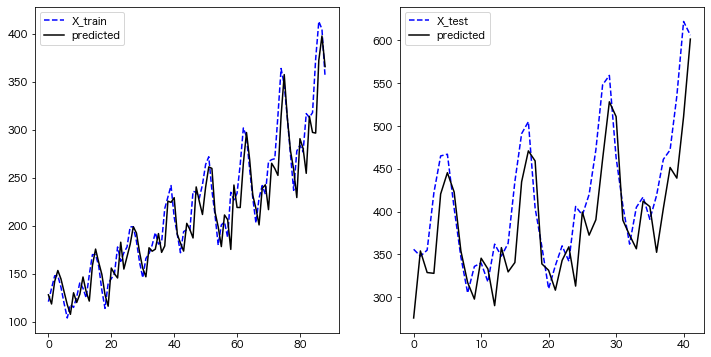

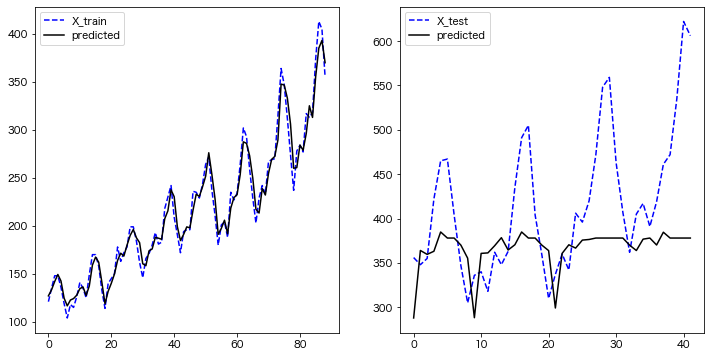

In [10]:
#!/usr/bin/env python
# coding: utf-8

import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math

import io
import requests

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
#content = pd.read_csv(io.StringIO(stream.decode('utf-8')),index_col='Month',parse_dates=True,dtype='float')
content = pd.read_csv(io.StringIO(stream.decode('utf-8')), usecols=[1], engine='python', skipfooter=3)
dataset = content.values



# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split, GridSearchCV

regressor1 = LinearRegression()
regressor2 =  SVR(kernel='linear', C=1e3)
regressor3 = RFR(n_jobs=-1, random_state=2525)
regressor1.fit(trainX,trainY)
regressor2.fit(trainX,trainY)
regressor3.fit(trainX,trainY)


for regressor in [regressor1,regressor2,regressor3]:
    
    fig = plt.figure(figsize=(12,6))
    
    # 学習結果を出力する
    plt.subplot(1,2,1)
    plt.plot(trainY, "--", color = 'b',label='X_train')
    plt.plot(regressor.predict(trainX), color = 'k',label='predicted')
    plt.legend()

    # 予測結果を出力する
    plt.subplot(1,2,2)
    plt.plot(testY, "--", color = 'b',label='X_test')
    plt.plot(regressor.predict(testX), color = 'k',label='predicted')
    plt.legend()

    plt.show()



Epoch 1/50


2022-05-14 16:19:36.001330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


46/46 - 0s - loss: 37805.5664 - 352ms/epoch - 8ms/step
Epoch 2/50
46/46 - 0s - loss: 20267.1426 - 166ms/epoch - 4ms/step
Epoch 3/50
46/46 - 0s - loss: 7398.6299 - 164ms/epoch - 4ms/step
Epoch 4/50
46/46 - 0s - loss: 1801.8528 - 168ms/epoch - 4ms/step
Epoch 5/50
46/46 - 0s - loss: 978.1585 - 168ms/epoch - 4ms/step
Epoch 6/50
46/46 - 0s - loss: 981.9501 - 167ms/epoch - 4ms/step
Epoch 7/50
46/46 - 0s - loss: 969.7604 - 170ms/epoch - 4ms/step
Epoch 8/50
46/46 - 0s - loss: 969.9902 - 165ms/epoch - 4ms/step
Epoch 9/50
46/46 - 0s - loss: 956.4545 - 170ms/epoch - 4ms/step
Epoch 10/50
46/46 - 0s - loss: 944.6526 - 174ms/epoch - 4ms/step
Epoch 11/50
46/46 - 0s - loss: 936.7176 - 171ms/epoch - 4ms/step
Epoch 12/50
46/46 - 0s - loss: 935.0419 - 169ms/epoch - 4ms/step
Epoch 13/50
46/46 - 0s - loss: 940.2972 - 164ms/epoch - 4ms/step
Epoch 14/50
46/46 - 0s - loss: 948.6004 - 163ms/epoch - 4ms/step
Epoch 15/50
46/46 - 0s - loss: 921.0647 - 168ms/epoch - 4ms/step
Epoch 16/50
46/46 - 0s - loss: 915.9482

2022-05-14 16:19:44.592494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-14 16:19:44.689273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


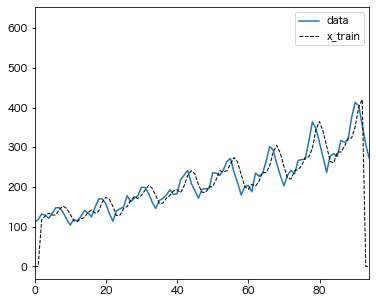

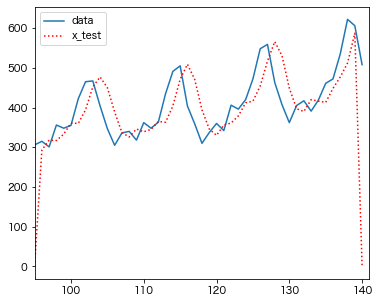

In [34]:
from keras.models import Sequential
from keras.layers import Dense

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=2, verbose=2)


# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)




# shift train predictions for plotting
plt.rcParams['figure.figsize'] = [6, 5]
trainPredictPlot = numpy.empty_like(dataset)

tempx = trainPredictPlot.shape[0]
tempy = trainPredictPlot.shape[1]
tempxy = int(tempx*tempy)
trainPredictPlot[:,:] = numpy.array([numpy.nan for i in range(tempxy)]).reshape(tempx,tempy)
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
tempx = testPredictPlot.shape[0]
tempy = testPredictPlot.shape[1]
tempxy = int(tempx*tempy)
testPredictPlot[:,:] = numpy.array([numpy.nan for i in range(tempxy)]).reshape(tempx,tempy)
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset,label='data')
plt.plot(trainPredictPlot,linewidth =1, linestyle = '--',color='k',label='x_train')
plt.xlim(0,train_size)
plt.legend()
plt.show()

plt.plot(dataset,label='data')
plt.plot(testPredictPlot,linestyle= ':',color='r',label='x_test')
plt.xlim(train_size+1,len(dataset))
plt.legend()
plt.show()